In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
from sklearn import linear_model

In [247]:
#df = pd.read_csv("Dataset/new_college2.csv") ## avg
df = pd.read_csv("Dataset/new_college3.csv") ## max

In [248]:
df.head()

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,FT%,Years,AP,LAT,SR,TQS,SVL,MVL,MBP,VORP
0,abdelal01,38,9.210526,NaN,4.684211,NaN,6.6,0.7,0.684211,1.263158,...,0.775,4,1,NaN,NaN,NaN,NaN,NaN,NaN,-0.460000
1,abdulma02,32,23.093750,7.687500,6.562500,NaN,3.4,4.1,1.718750,0.187500,...,0.910,2,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.088889
2,abdulta01,32,17.576923,2.730769,7.538462,NaN,8.8,2.6,1.500000,0.880000,...,0.741,3,1,NaN,NaN,NaN,NaN,NaN,NaN,-0.216667
3,abdursh01,28,14.214286,0.750000,8.892857,NaN,8.4,1.0,1.857143,1.250000,...,0.683,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.772727
4,ackeral01,31,13.129032,4.419355,3.689655,NaN,6.5,3.8,1.827586,0.483871,...,0.858,3,0,11.67,NaN,3.35,28.0,32.0,11.0,-0.150000


In [249]:
df_cleaned = df.fillna(np.mean(df, axis=0))

In [251]:
df_cleaned.shape

(2001, 26)

In [252]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP'],
      dtype='object')

In [253]:
X = df_cleaned.values[:,1:24]
Y = df_cleaned.VORP

In [6]:
from sklearn.preprocessing import StandardScaler

In [254]:
X_normed = StandardScaler().fit_transform(X)

/Users/farahshih/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [255]:
X_normed

array([[  1.37122726e+00,  -8.85543582e-01,  -9.34448294e-16, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [ -4.65746013e-01,   3.01939733e+00,   1.90619248e+00, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [ -4.65746013e-01,   1.46767680e+00,  -1.79788677e-01, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       ..., 
       [ -1.59583801e-01,  -1.14566590e+00,  -1.26523706e+00, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [  4.52740622e-01,  -1.58895854e+00,  -6.23078436e-01, ...,
         -2.68904671e+00,   2.78245600e+00,   3.12380257e+00],
       [ -2.30271928e+00,  -1.16112032e+00,  -1.05383704e+00, ...,
          2.27667261e+00,  -2.46689929e+00,  -2.17067071e+00]])

In [9]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [257]:
ten_fold = model_selection.KFold(n_splits=10)

In [258]:
lr_model = LinearRegression()
# lr_model.fit(X_normed, Y)

R2 = model_selection.cross_val_score(lr_model, X_normed, Y, cv=ten_fold, scoring='r2')
MSE = model_selection.cross_val_score(lr_model, X_normed, Y, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE))

R Squared score of 10-fold cross validation: [ 0.09599523  0.21807961  0.28544556  0.14901467  0.15435952  0.14433719
  0.26827375  0.18854685  0.07016258  0.11078274] 
MSE score of 10-fold cross validation: [ 0.65181014  0.32233333  0.62773539  0.52392288  0.80447062  0.70857657
  0.72079982  0.6161042   0.40223374  0.59593942] 


## Drop Physical Attributes

In [259]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP'],
      dtype='object')

In [260]:
df_cleaned.head(3)

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,FT%,Years,AP,LAT,SR,TQS,SVL,MVL,MBP,VORP
0,abdelal01,38,9.210526,3.157985,4.684211,1.875945,6.6,0.7,0.684211,1.263158,...,0.775,4,1,11.33395,3.045263,3.278702,29.759546,34.894886,10.743644,-0.460000
1,abdulma02,32,23.093750,7.687500,6.562500,1.875945,3.4,4.1,1.718750,0.187500,...,0.910,2,0,11.33395,3.045263,3.278702,29.759546,34.894886,10.743644,-0.088889
2,abdulta01,32,17.576923,2.730769,7.538462,1.875945,8.8,2.6,1.500000,0.880000,...,0.741,3,1,11.33395,3.045263,3.278702,29.759546,34.894886,10.743644,-0.216667


In [261]:
df_cleaned["Y1"]=0.0
df_cleaned["Y2"]=0.0
df_cleaned["Y3"]=0.0
df_cleaned["Y4"]=0.0

In [262]:
df_cleaned.Y1[df_cleaned["Years"]==1.0]=1.0
df_cleaned.Y2[df_cleaned["Years"]==2.0]=2.0
df_cleaned.Y3[df_cleaned["Years"]==3.0]=3.0
df_cleaned.Y4[df_cleaned["Years"]==4.0]=4.0

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/farahshih/anacon

In [47]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP', 'VORP_Max', 'Y1', 'Y2', 'Y3',
       'Y4'],
      dtype='object')

In [263]:
X_1_t = df_cleaned.ix[:,['G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 'PF', 'MP.1', 
                       'PTS.1', 'FG%', '3P%', 'FT%', 'AP', 'LAT','SR', 'TQS', 'SVL', 'MVL', 'MBP', 'Y1', 'Y2', 'Y3','Y4']]
X_1 = X_1_t.values
Y_1 = df_cleaned.VORP
X_1_normed = StandardScaler().fit_transform(X_1)

lr_model_1 = LinearRegression()
# lr_model.fit(X_normed, Y)

R2_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='r2').mean()
MSE_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2_1))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE_1))

R Squared score of 10-fold cross validation: 0.16702067957260538 
MSE score of 10-fold cross validation: [ 0.64715776  0.32012906  0.63164038  0.53561961  0.81136337  0.70674849
  0.72299619  0.61105099  0.39918818  0.60235655] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118d27358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce0afd0>]], dtype=object)

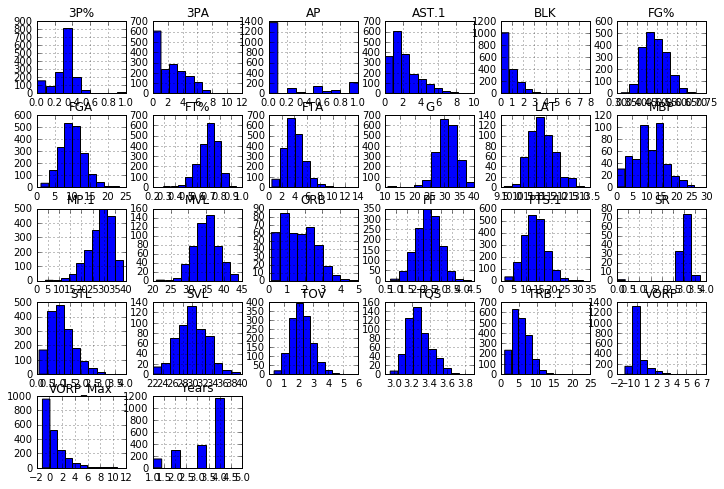

In [14]:
df.hist(figsize=(12,8), layout=(5,6))

## Cart

In [264]:
cart1 = DecisionTreeRegressor(min_samples_split=10, max_depth=2)
cart1.fit(X_1_normed, Y_1)
print(cart1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [265]:
model_selection.cross_val_score(cart1, X_1_normed, Y_1, scoring = 'neg_mean_squared_error', cv = 10)

array([-0.70667746, -0.42450278, -0.7765659 , -0.64105684, -0.91990804,
       -0.83097586, -0.91316576, -0.69308335, -0.4604259 , -0.69060672])

In [266]:
model_selection.cross_val_score(cart1, X_1_normed, Y_1, scoring = 'r2', cv = 10)

array([ 0.01989898, -0.02976439,  0.11603102, -0.04124097,  0.03301444,
       -0.00346973,  0.07299178,  0.08715981, -0.06435932, -0.03047288])

## Binary Classification

In [267]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP', 'Y1', 'Y2', 'Y3', 'Y4'],
      dtype='object')

In [268]:
df_cleaned["Superstar"]="0"
df_cleaned.Superstar[df_cleaned["VORP"]>=1]="1"

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [269]:
Y_2 = df_cleaned.Superstar

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_1_normed, Y_2)

In [274]:
logreg = linear_model.LogisticRegression(class_weight='balanced')
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [275]:
Y_test_pred = logreg.predict(X_test)
Y_train_pred = logreg.predict(X_train)

In [184]:
from sklearn import metrics

In [276]:
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[971 329]
 [ 56 144]]
[[325 126]
 [ 18  32]]


In [277]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_features = 5, class_weight="balanced")

In [278]:
rf.fit(X_train, Y_train)
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[1300    0]
 [  24  176]]
[[444   7]
 [ 43   7]]


In [279]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
gbc.fit(X_train, Y_train)
Y_train_pred = gbc.predict(X_train)
Y_test_pred = gbc.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[1300    0]
 [   2  198]]
[[438  13]
 [ 40  10]]


## Classification

In [280]:
df_cleaned["Superstar2"]="0"
df_cleaned.Superstar2[(df_cleaned["VORP"]>=0) & (df_cleaned["VORP"]<2)]="1"
df_cleaned.Superstar2[df_cleaned["VORP"]>=2]="2"

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [281]:
Y_3 = df_cleaned.Superstar2

In [282]:
rf = RandomForestClassifier(n_estimators = 50, max_features = 5, class_weight="balanced")

In [283]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1_normed, Y_3)

In [284]:
rf.fit(X_train, Y_train)
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[757   0   0]
 [  0 676   0]
 [  0   0  67]]
[[190  78   0]
 [117  90   0]
 [  8  18   0]]
